### CMM262: Statistics, Day 2 - Part 1 - Distributions

In [3]:
library(ggplot2)
library(palmerpenguins)

Want to understand how all the pieces fit together? Read R for Data Science: https://r4ds.had.co.nz/

### Exercise 3 - Discrete Distributions - Binomial Distribution


R has many built-in functions for working with distributions. These generally follow these conventions:

* Probability Density Functions (PDFs and PMFs) - start with 'd' for 'density'.

* Cumulative Distribution Functions (CDFs) start with 'p' for 'probability'.

* Quantile Functions start with q. 

* Functions to generate random values from a distribution start with 'r' for random.

Let's learn how to use these functions in the context of the binomial distribution. The binomial distribution describes the number of 'successes' (k) observed from n Bernoulli trials.

Let's plot the binomial PMF using parameters: n=10 and p=0.1.


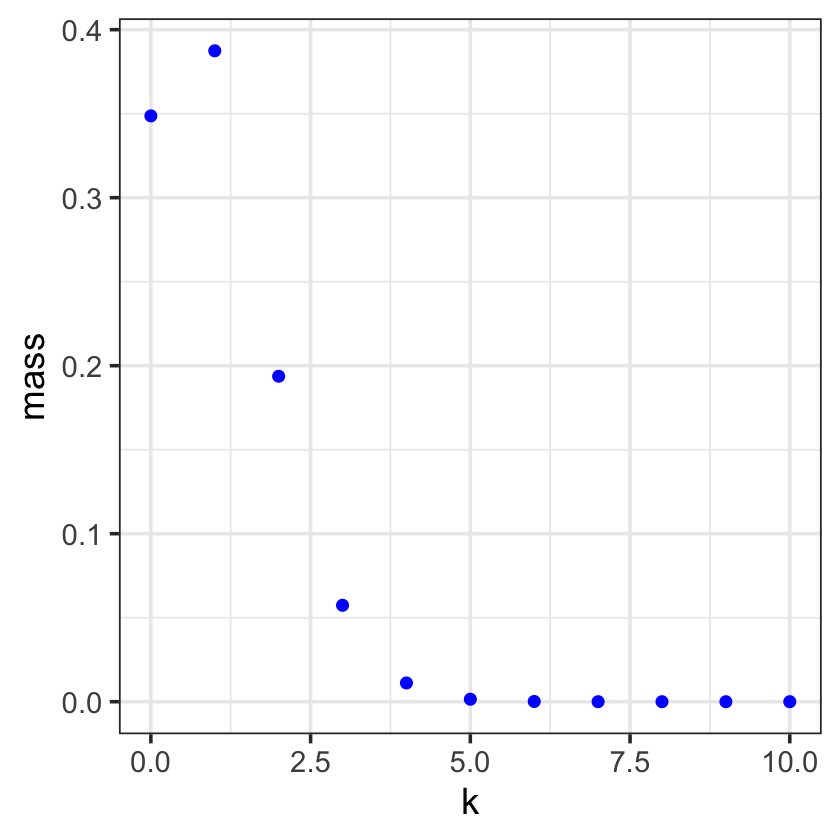

In [4]:
n = 10
k = seq(0, n, by=1)
p = 0.1
y = dbinom(k, n, p)

binom.pmf <- data.frame(k=k, mass=y)

ggplot(binom.pmf,  aes(k, mass)) + geom_point(color="blue", size=3) + theme_bw(base_size=22)

Now let's plot the binomial PMF for n=15, and p=0.5.

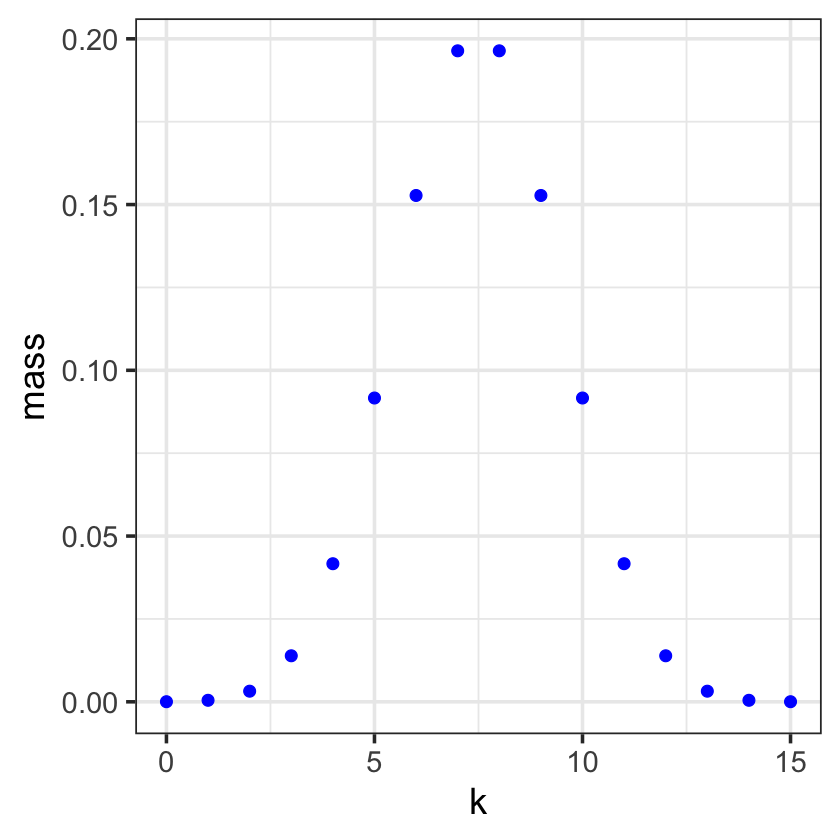

In [5]:
n = 15
p=0.5
k = seq(0, n, by=1)
y = dbinom(k, n, p)

binom.pmf <- data.frame(k=k, mass=y)

ggplot(binom.pmf,  aes(k, mass)) + geom_point(color="blue", size=3) + theme_bw(base_size=22)

Now let's randomly sample from the binomial distribution with the same parameters as above.


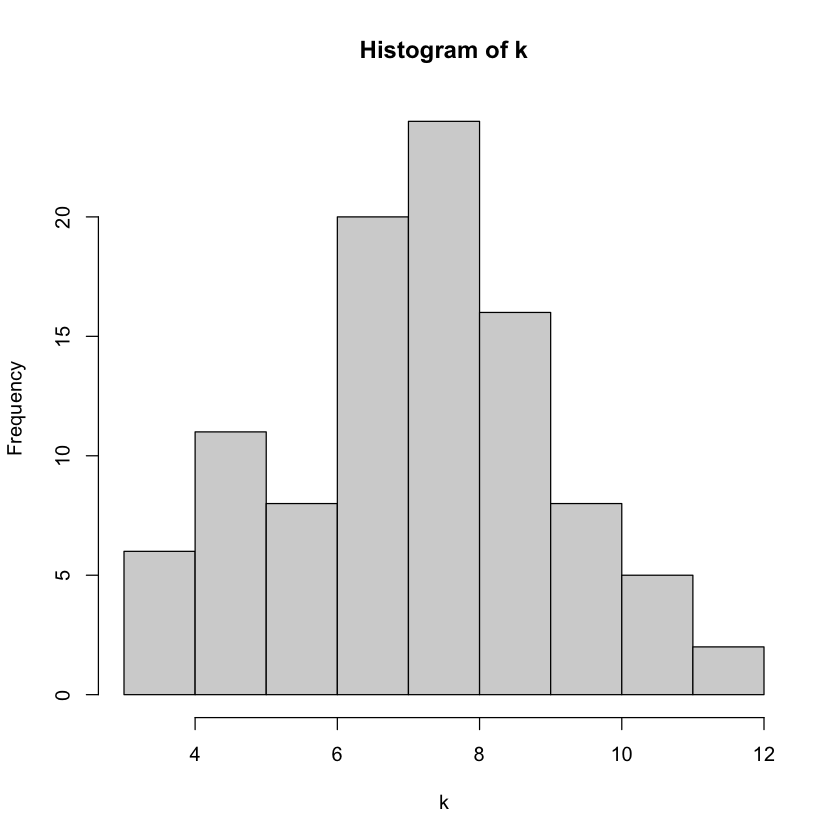

In [6]:
num.samples <- 100
k <- rbinom(num.samples, 15, 0.5)

# Plot a histogram of the random sample
hist(k, breaks=10)

Revisiting the penguin dataset from last class, how many male penguins are there in our sample?


In [7]:
library(palmerpenguins)

# remove samples where sex is unknown
penguins <- penguins[!is.na(penguins$sex),]


n.male = sum(penguins$sex == "male")
n.female = sum(penguins$sex == "female")
n.penguin = n.male + n.female

cat("There are", n.male, "male and", n.female, "female penguins" )

There are 168 male and 165 female penguins

Assuming proportion parameter for male/female is 50%, what is the probability of observing exactly this number of male penguins in our sample?

In [8]:
dbinom(n.male, n.penguin, 0.5)


[1] 0.04310628

Let's plot the theoretical probability density function for the sample of n penguins, assuming p=0.5

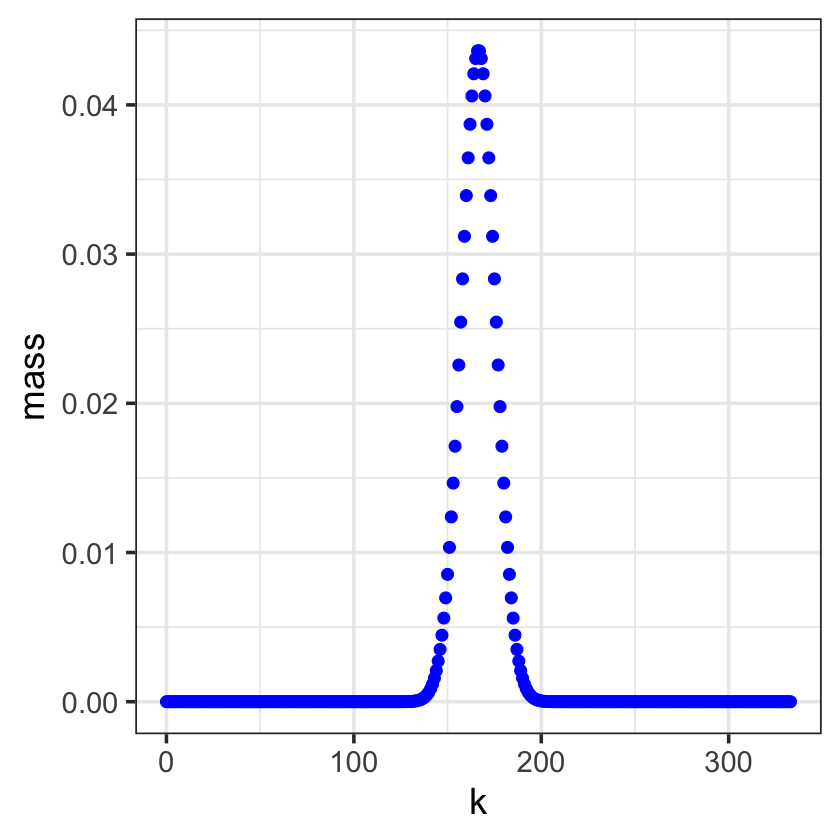

In [9]:
n = n.penguin
p=0.5
k = seq(0, n, by=1)
y = dbinom(k, n, p)

binom.pmf <- data.frame(k=k, mass=y)

ggplot(binom.pmf,  aes(k, mass)) + geom_point(color="blue", size=3) + theme_bw(base_size=22)

Is it surprising that we observed this many male penguins? How might we test this? 

### Exercise 4 - Central Limit Theorem

Let's assume that the entire population of penguins are the ones in our dataset, and that we are only able to obtain small samples of penguins for research purposes.

We are going to focus on the body mass of the penguins for this exercise. Let's limit ourselves to the set of penguins which have a measurement for this trait.

In [10]:
# remove rows where body mass is not defined
penguins <- penguins[!is.na(penguins$body_mass_g),]

Let's first take a look at the population distribution

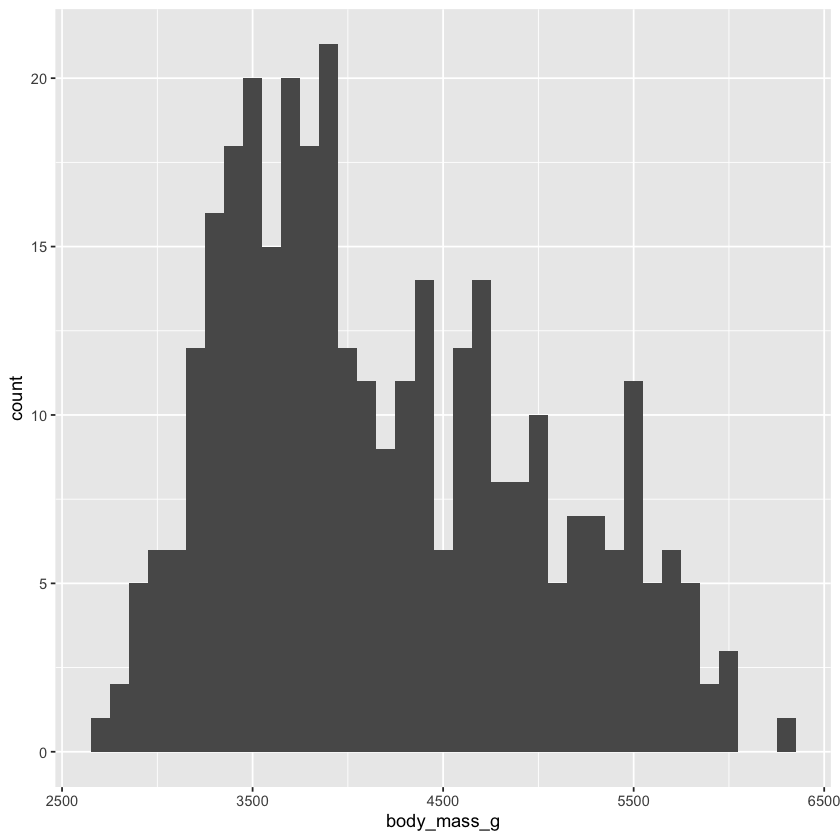

In [11]:
ggplot(data=penguins, aes(body_mass_g)) + geom_histogram(binwidth = 100)

The data do not look all that normal. But that's OK! What is the population mean?


In [12]:
mean(penguins$body_mass_g)

[1] 4207.057

Now let's pretend that our study is not very well funded and we are only able to sample and weigh 10 penguins from the population each expedition. 

In [13]:
samp.size = 10
samp.mass = sample(penguins$body_mass_g, samp.size)
mean(samp.mass)

[1] 4102.5

The Central Limit Theorem says that sample means taken in this way should be normally distributed around the true population mean. And that this distribution should have standard deviation equal to the population standard deviation / sqrt(sample size). 

Let's test this idea out by repeating our sampling process 1000 times and looking at the resulting distribution of sample means.

In [14]:
samp.size = 10
samp.means = c()
for(i in 1:1000) {
  samp.mass = sample(penguins$body_mass_g, samp.size)
  samp.means[i] = mean(samp.mass)}

Now let's look at the histogram of sample means. Does it line up with the theoretical distribution?

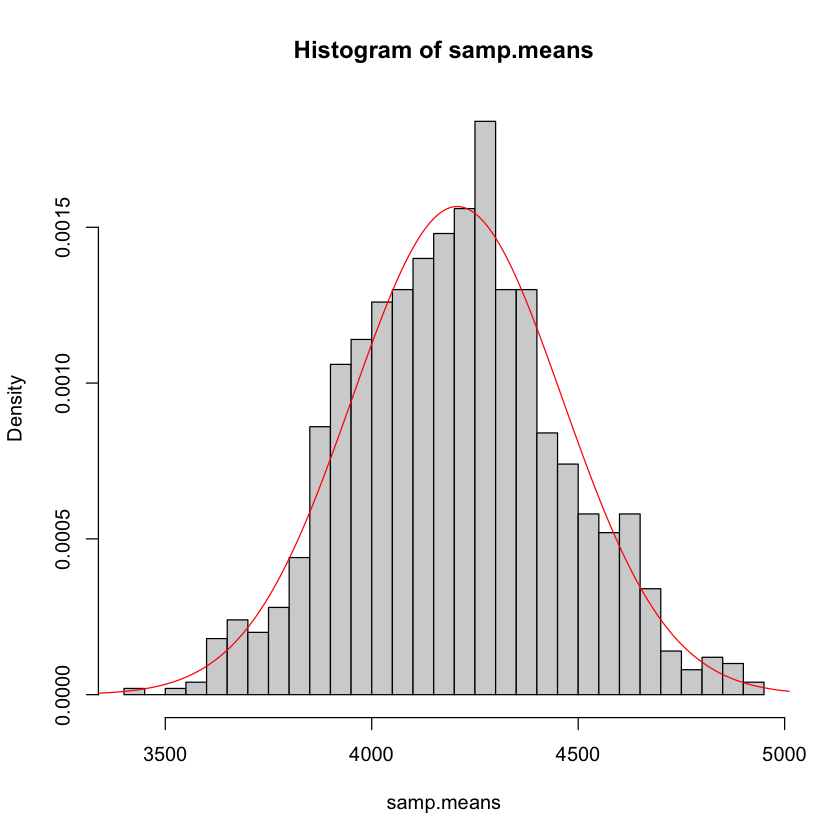

In [15]:
# compute theoretical normal distribution with mean equal to pop. mean, and stdev equal to S.E.
standard.err = sd(penguins$body_mass_g) / sqrt(samp.size)
x = seq(min(penguins$body_mass_g), max(penguins$body_mass_g), by=10)
predicted.density = dnorm(x, mean=mean(penguins$body_mass_g), sd=standard.err)

# make a histogram of the sample means
hist(samp.means, breaks=30, freq=F)

# draw a curve of the theoretical distribution over top
lines(x, predicted.density, col="red")

Pretty cool! What if we had a larger budget and we could sample 40 penguins each expedition? This should reduce the standard error about 2 fold (sqrt(40)/sqrt(10) = 2).

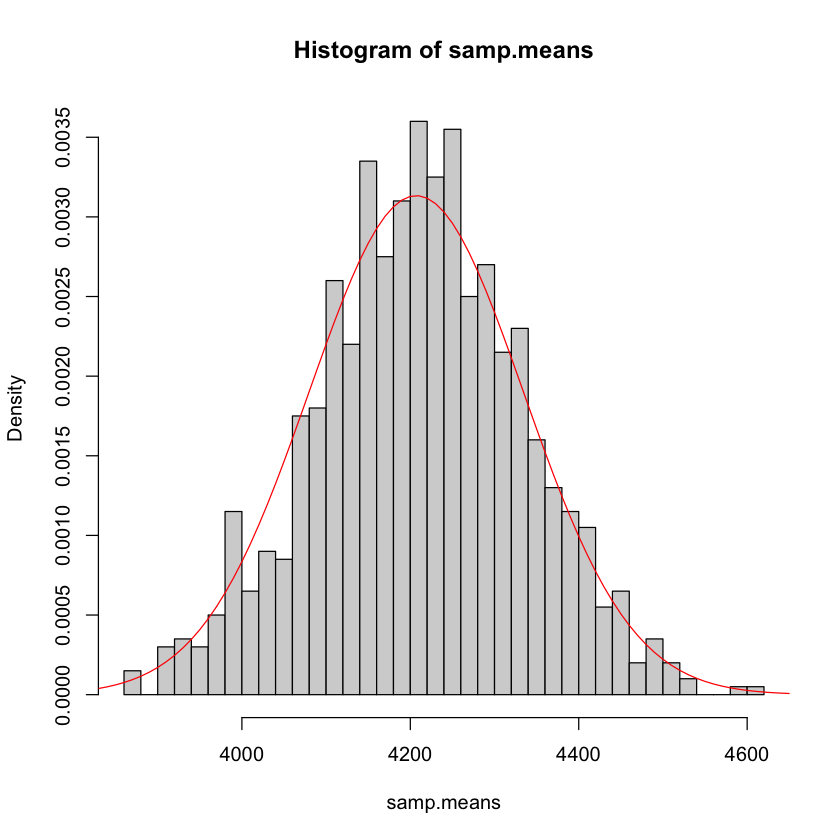

In [16]:
samp.size = 40
samp.means = c()
for(i in 1:1000) {
  samp.mass = sample(penguins$body_mass_g, samp.size)
  samp.means[i] = mean(samp.mass)
}
# compute theoretical normal distribution with mean equal to pop. mean, and stdev equal to S.E.
standard.err = sd(penguins$body_mass_g) / sqrt(samp.size)
x = seq(min(penguins$body_mass_g), max(penguins$body_mass_g), by=10)
predicted.density = dnorm(x, mean=mean(penguins$body_mass_g), sd=standard.err)

# make a histogram of the sample means
hist(samp.means, breaks=30, freq=F)

# draw a curve of the theoretical distribution over top
lines(x, predicted.density, col="red")

# Excercise 6 - Hypothesis Testing

We want to test whether the mass of adelie and chinstrap penguins differ.
First, let's compute a z-score for the difference in means.

In [17]:
adelie.mean = mean(penguins$body_mass_g[penguins$species=="Adelie"] )
adelie.sd = sd(penguins$body_mass_g[penguins$species=="Adelie"])
adelie.n = sum(penguins$species=="Adelie")

chinstrap.mean = mean(penguins$body_mass_g[penguins$species=="Chinstrap"] )
chinstrap.sd = sd(penguins$body_mass_g[penguins$species=="Chinstrap"])
chinstrap.n = sum(penguins$species=="Chinstrap")

z = (adelie.mean - chinstrap.mean) / sqrt((adelie.sd**2)/adelie.n + (chinstrap.sd**2)/chinstrap.n)
z

[1] -0.4479297

What fraction of the standard normal distribution is to the left of this z-score?

In [18]:
pnorm(z, mean=0, sd=1)

[1] 0.327102

What fraction of the standard normal distribution is to the right of -z?

In [19]:
pnorm(-z, mean=0, sd=1, lower.tail=F)

[1] 0.327102

The distribution is symmetric, so we could have just multiplied by 2 

In [20]:
p.value = pnorm(z, mean=0, sd=1)*2
cat("The p-value from the two-sided two-sample z-test is", p.value)

The p-value from the two-sided two-sample z-test is 0.654204

We fail to reject the null hypothesis.
What about if we use a t-test instead?

In [21]:
t.test(penguins$body_mass_g[penguins$species=="Adelie"],
       penguins$body_mass_g[penguins$species=="Chinstrap"])


	Welch Two Sample t-test

data:  penguins$body_mass_g[penguins$species == "Adelie"] and penguins$body_mass_g[penguins$species == "Chinstrap"]
t = -0.44793, df = 154.03, p-value = 0.6548
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -145.66494   91.81724
sample estimates:
mean of x mean of y 
 3706.164  3733.088 


Note that the t-statistic is very similar to the z-statistic and so are the p-values. T-tests are very similar to z-tests for large sample sizes (n). They are most important to use (instead of z-tests) when sample sizes are small.

# Excercise 7 - Correlations and Linear Models

What if we want to quantify the relationship between two variables? One way to do this is with correlation statistics.

For example, we can test whether bill length is correlated with body mass.

First we can make a scatterplot to visualize the relationship.

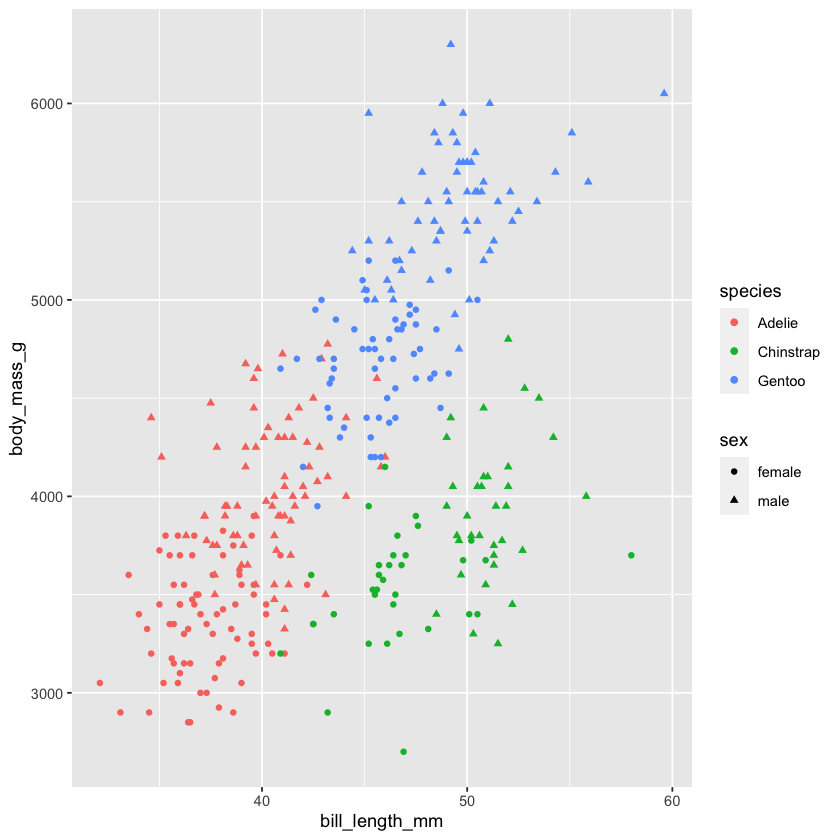

In [23]:
ggplot(penguins, aes(x=bill_length_mm, y=body_mass_g, color=species, shape=sex)) + geom_point()

It looks like there is a relationship, but it it is different for the different species. Let's focus on the Gentoo.

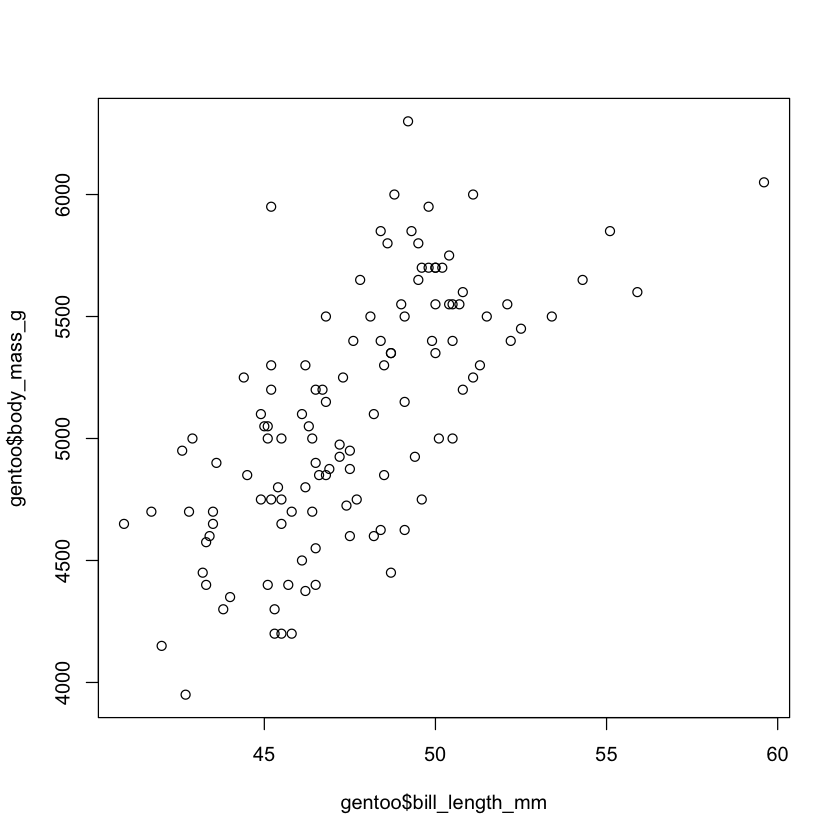

In [28]:
gentoo = penguins[penguins$species=="Gentoo",]
plot(x=gentoo$bill_length_mm, y=gentoo$body_mass_g)

We can use cor to compute the correlation coefficient.

In [30]:
r = cor(gentoo$bill_length_mm, y=gentoo$body_mass_g)
cat("The Pearson correlation coefficient is r=", r, "\n")

The Pearson correlation coefficient is r= 0.6667302 


But how do we know if this is significant? We can use the cor.test function instead.

In [31]:
cor.test(gentoo$bill_length_mm, y=gentoo$body_mass_g)


	Pearson's product-moment correlation

data:  gentoo$bill_length_mm and gentoo$body_mass_g
t = 9.6764, df = 117, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5531129 0.7559994
sample estimates:
      cor 
0.6667302 


Alternatively, we can fit a linear model to the data.


Call:
lm(formula = gentoo$body_mass_g ~ gentoo$bill_length_mm)

Residuals:
    Min      1Q  Median      3Q     Max 
-764.28 -236.67  -15.68  240.94 1112.47 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -27.90     530.28  -0.053    0.958    
gentoo$bill_length_mm   107.64      11.12   9.676   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.3 on 117 degrees of freedom
Multiple R-squared:  0.4445,	Adjusted R-squared:  0.4398 
F-statistic: 93.63 on 1 and 117 DF,  p-value: < 2.2e-16


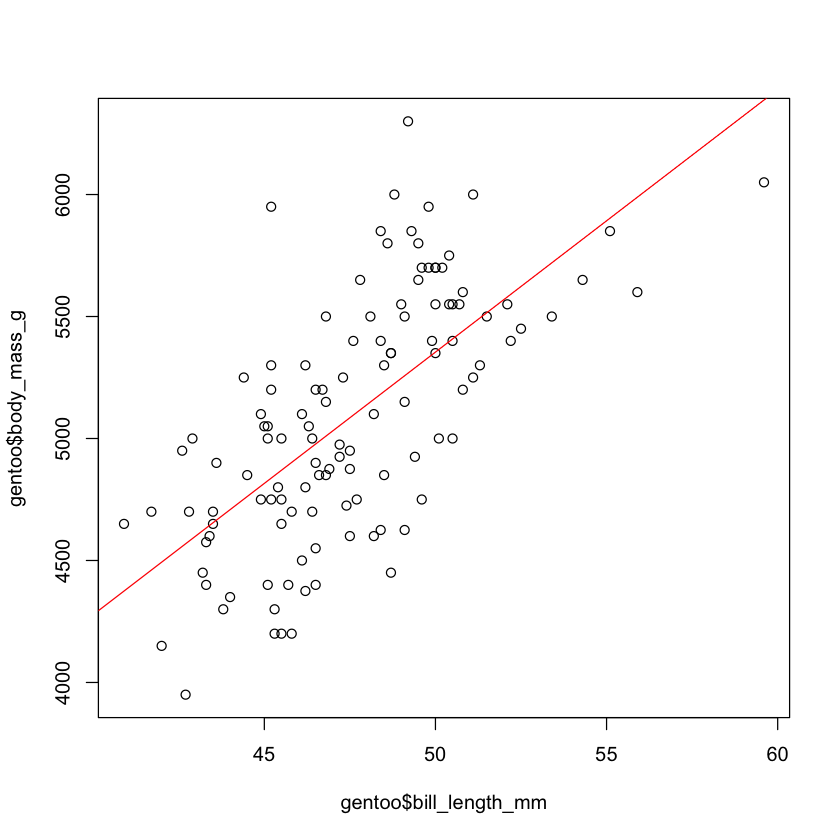

In [32]:
mdl = lm(gentoo$body_mass_g ~ gentoo$bill_length_mm)
summary(mdl)
plot(x=gentoo$bill_length_mm, y=gentoo$body_mass_g)
abline(mdl$coef, col="red")
